# Gün 2 bölüm 1: Bir SIR'in yapı taşları

<div style="background: #f8f9fa; padding: 0.5rem 1rem; border-radius: 8px; margin-bottom: 1rem; border-left: 4px solid #007bff;">
<a href="../../index.ipynb" style="text-decoration: none; color: #007bff; font-weight: bold;">← Kurs Dizinine Geri Dön</a> | 
<a href="../../index-tr.ipynb" style="text-decoration: none; color: #dc3545; font-weight: bold;">🇹🇷 Türkçe Index</a>
</div>

---

Artık bir bölmeli modeli nasıl kodlayacağımızı biliyoruz. Ayrıca SIR modelinin ne olduğunu ve ana yapı taşlarının neler olduğunu biliyoruz. Bu alıştırmada tamamen dinamik bir SIR modeli oluşturmak için önceki kodumuz üzerine inşa edeceğiz.

## 1. Bir SIR modeli inşa etmek

### Vaka çalışması: şehrinizde yeni bir X2021 virüsü tespit edildi ve şu anda bir salgına neden oluyor. DSÖ tarafından bu salgının potansiyel büyüklüğü hakkında geniş bir fikir edinmek için modelleme projeksiyonları sağlamanız için görevlendirildiniz. Devam eden epidemiyolojik araştırma, model geliştirmenizde size rehberlik edebilecek şu gerçekleri belirledi:

1)  Virüs, solunum yolundan mikro damlacıklar yoluyla insandan insana bulaşır.

2)  Enfeksiyon yerleştikten sonra enfekte bireyler ortalama 6 günlük bir süre boyunca bulaştırıcı kalır

3)  Komşu bir kasabada X2021'in önceki bir salgınından CFR'nin ~%15 olduğunu biliyoruz

4)  Herhangi bir popülasyon grubunda artan duyarlılık için bilinen bir faktör tanımlanmamıştır

5)  Aynı önceki salgından, günde 0.5 enfeksiyon oranı (%95 GA 0.3 ile 0.6) tahmin edilmiştir Görev: Aşağıdaki kodu (önceki oturumumuzdan) kullanarak yukarıdaki vakayı yansıtan bir SIR modeli kurun ve aşağıdaki soruları cevaplamaya çalışın:

    1)  X2021 salgınının ne zaman zirve yapmasını bekliyoruz (gün olarak)?

        **Cevap: 25 günde enfeksiyonlarda bir zirve görebiliriz**

    2)  Salgının sonunda kaç kişinin enfekte olmasını bekliyoruz?

        **Cevap: sonunda yaklaşık 916 bireyin enfekte olmasını bekleyebiliriz (R+M)**

    3)  Enfeksiyon oranındaki belirsizliğe dayalı olarak salgının nihai büyüklüğü (enfekte sayısı) ve beklenen zirve (gün olarak) için bir aralık verebilir misiniz?

        **Cevap: Beta =0.3 için modeli çalıştırdığımızda 647'lik bir nihai salgın büyüklüğü ve 56. günde enfeksiyonlarda bir zirve elde ederiz. Beta = 0.6 için 957 enfeksiyondan oluşan bir nihai büyüklük ve 19. günde bir zirve elde ederiz**

Not: Aşağıdaki kodu R Studio oturumunuza kopyalayın. ?? ile işaretlenmiş boşlukları doldurmaya çalışın

here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


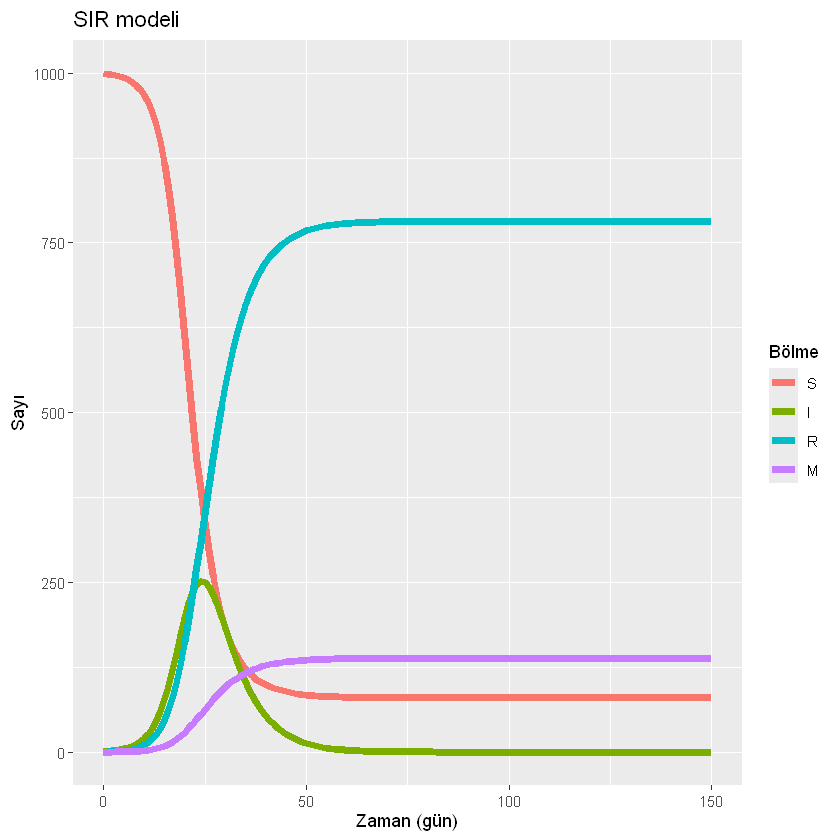

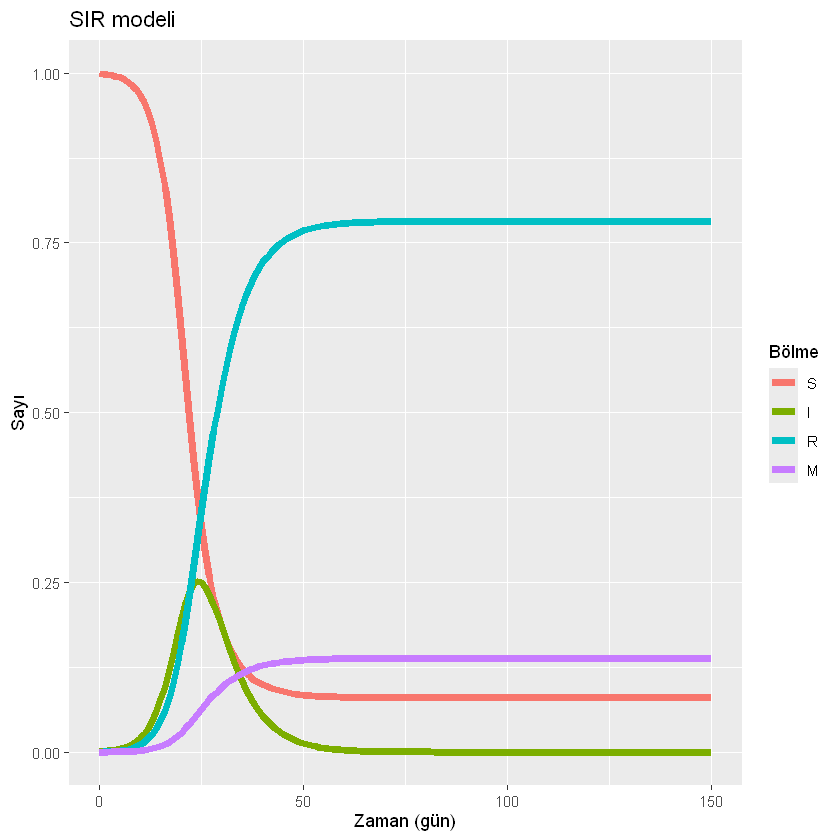

In [1]:
# PAKETLERİ YÜKLE:
library(deSolve)
library(reshape2)
library(ggplot2)
library(here)

setwd(here())
# Popülasyon büyüklüğü:
N <- 1000

# MODEL GİRDİLERİ:

# Başlangıç koşulları
initial_state_values <- c(
  S = N-1,
  I = 1,
  R = 0,
  M = 0)           

# Günlük parametre değerleri
  CFR<- 0.15
   
  gamma <- 1/6 # İyileşme oranı 
  
  beta <- 0.5  # enfeksiyon oranı
  
  mu <- gamma*CFR/(1-CFR)   # Ölüm oranı [rekabet eden tehlikeleri hatırla! gamma*CFR/(1-CFR) ]
  
  parameters <- c(beta, gamma, mu)


# MODEL FONKSİYONU: 
times <- seq(from = 0, to = 150, by = 1)   # 0'dan 365 güne kadar günlük aralıklarla

sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Toplam popülasyon büyüklüğü N'i hesaplama (her bölmedeki kişi sayısının toplamı)
    
    N <- S+I+R
    
    # FOI'yi hesaplama
    
    lambda <- beta*I/N  #  Enfeksiyon kuvvetini nasıl tanımlayabiliriz? 
      
      # Diferansiyel denklemler
      dS <-  - lambda * S # S için diferansiyel denklemi yazabilir misin? 
      dI <- lambda * S - I*(gamma+mu)     
    dR <- gamma * I
    dM <- I*mu
    
    return(list(c(dS, dI, dR, dM))) 
  })
  
}



# MODEL ÇIKTISI (diferansiyel denklemleri çözme):

# ode entegrasyon algoritmasını kullanarak diferansiyel denklemleri çözme
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))



# çıktı veri setini uzun formata çevir
output_long <- melt(as.data.frame(output), id = "time")                 


# S, I ve R bölmelerindeki kişi sayısını zaman içinde çiz
ggplot(data = output_long,                                               # çizilecek verileri içeren nesneyi belirt
       aes(x = time, y = value, colour = variable, group = variable)) +  # sütunları eksenlere ve gruplara ata
  geom_line(size=2) +                                                          # verileri çizgi olarak temsil et
  xlab("Zaman (gün)")+                                                   # x ekseni için etiket ekle
  ylab("Sayı") +                                                       # y ekseni için etiket ekle
  labs(colour = "Bölme",                                           # açıklama başlığı ekle  
       title = "SIR modeli")    



# Bireylerin oranını çiz 

output2_long<- output_long
output2_long$value<-output_long$value/N


# S, I ve R bölmelerindeki kişilerin oranını zaman içinde çiz
ggplot(data = output2_long,                                               # çizilecek verileri içeren nesneyi belirt
       aes(x = time, y = value, colour = variable, group = variable)) +  # sütunları eksenlere ve gruplara ata
  geom_line(size=2) +                                                          # verileri çizgi olarak temsil et
  xlab("Zaman (gün)")+                                                   # x ekseni için etiket ekle
  ylab("Sayı") +                                                       # y ekseni için etiket ekle
  labs(colour = "Bölme",                                           # açıklama başlığı ekle  
       title = "SIR modeli")   


## SIR varsayımlarının analizi

Dersimizde gözden geçirilen ana varsayımlar ve kavramlar hakkında düşünün ve şunları cevaplamaya çalışın:

1)  Enfeksiyon riski homojen varsayımı neden bir basitleştirmedir ve bu durumu hangi faktörler etkileyebilir? Potansiel heterojenlik kaynakları nelerdir?

    **Cevap: Potansiel heterojenlik kaynakları arasında bazı duyarlı kişilerde artan duyarlılık (immünsüpresyon) veya yaş veya meslek gibi faktörlerle enfeksiyona artan maruziyet sayabiliriz.**

2)  Popülasyon genelinde homojen bir p varsayımımızı hangi faktörler etkileyebilir?

    **Cevap: p, temas başına bulaşma olasılığıdır. Bu sabit, temas türü, temasın yoğunluğu ve süresi ve hatta her temastaki enfeksiyon vericisinin hastalık evresi göz önüne alındığında büyük ölçüde değişebilir. Bu nedenle bir basitleştirmedir, ancak salgının popülasyon düzeyindeki davranışını tanımlamak için iyi bir şekilde geçerlidir.**